In [1]:
                                                 #Crime Data

In [28]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

#keep file in same directory

In [6]:
cd = pd.read_csv("crime_data (1).csv")

print(cd.describe())         #shows the summary.
cd.info()                    #Shows the information along with null values.

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [14]:
#now we have to standardize the data.

def std_fn(x):
    y=(x-x.min())/(x.std())
    return (y)

cd_std = std_fn(cd.iloc[ : , 1:])
cd_std.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,1.604405,1.509042,2.317136,1.487447
std,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000
25%,0.751921,0.767960,1.554430,0.830096
50%,1.480883,1.367929,2.348916,1.366589
75%,2.399260,2.447873,3.160673,2.015185
max,3.811265,3.503818,4.076060,4.131797


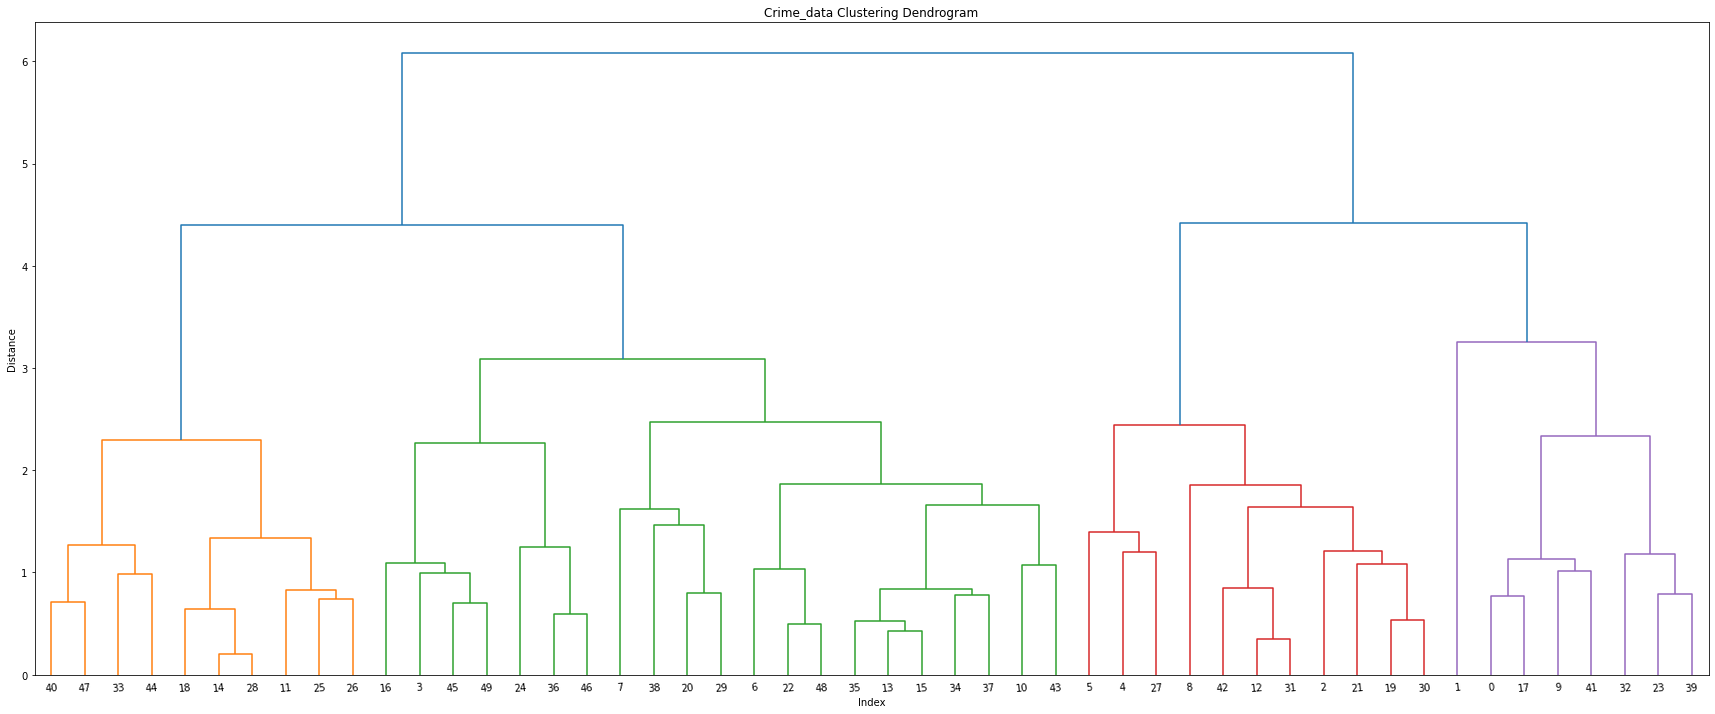

In [35]:
z = linkage(cd_std, method = "complete", metric = "euclidean")
plt.figure(figsize=(30, 12));plt.title('Crime_data Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 5,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [37]:
cd_comp = AgglomerativeClustering(n_clusters = 3 , linkage = "complete" ,affinity = "euclidean" ).fit(cd_std)
cd_comp.labels_

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
cd_cluster_column = pd.Series(cd_comp.labels_)

#now assign this matrix to to data set as a new column.

cd['grouping']=cd_cluster_column

cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,grouping
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [57]:
#now take the grouping column to the 1st.

cd_new = cd.iloc[ : ,[5,0,1,2,3,4] ]
cd_new

,grouping,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.2
1,1,Alaska,10.0,263,48,44.5
2,2,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,2,California,9.0,276,91,40.6
5,2,Colorado,7.9,204,78,38.7
6,0,Connecticut,3.3,110,77,11.1
7,0,Delaware,5.9,238,72,15.8
8,2,Florida,15.4,335,80,31.9
9,1,Georgia,17.4,211,60,25.8


In [59]:
#Aggregate mean of each cluster.
cd_new.iloc[:, 2:].groupby(cd.grouping).mean()

#here we can see there are 3 types of grouping present as per murder.

,Murder,Assault,UrbanPop,Rape
grouping,,,,
0,5.003226,116.483871,63.838710,16.338710
1,14.087500,252.750000,53.500000,24.537500
2,11.054545,264.090909,79.090909,32.618182
